In [27]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

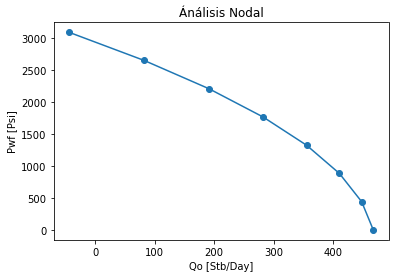

In [12]:
#####     METODO DE VOGEL
epwf1 =1765   #presíon de fondo fluyente (psi)
epr1 = 3085   #presíon de reservorio  (psi)
epb1 = 2100   #presíon de borbuja (psi)
eqo1 = 282    #Tasa de produccion (stb/day)
def calculo_vogel():
  la = epwf1/(epr1+1)
  vogel = (eqo1) / (1 - (0.2 * la) - (0.8*(la ** 2)))
  return vogel
for grafico in range(8):
  if (epr1) <= (epb1):
      def calcular():
          grafico1 = []
          a1 = float(epr1)
          y1 = np.linspace(0, a1, 8)
          for y1 in y1:
              pr1 = float(epr1)
              a = float(epwf1) / (epr1)
              qomax = (eqo1) / (1 - (0.2 * a) - (0.8 * (a ** 2)))
              x1 = qomax * (1 - (0.2 * (y1 / pr1)) - (0.8 * ((y1 / pr1) ** 2)))
              grafico1.append(x1)
          a1 = float(epr1)
          y1 = np.linspace(0, a1, 8)
          plt.plot(grafico1, y1)
          plt.scatter(grafico1, y1)
          plt.title("Ánálisis Nodal")
          plt.xlabel("Qo [Stb/Day]")
          plt.ylabel("Pwf [Psi]")
          plt.show()
          xx, yy=grafico1,y1
          return xx, yy
  else:
      if epwf1 >= epb1:
          def calcular():
              grafico2 = []
              a1 = float(epr1)
              y1 = np.linspace(0, a1, 8)
              for y1 in y1:
                  J = float(eqo1) / (float(epr1) -epwf1)
                  Qb = J * (float(epr1) - float(epb1))
                  b1 = (y1 / (float(epb1) + 1))
                  x2 = Qb + ((J * epb1 / 1.8) * (1 - (0.2 * b1) - (0.8 * (b1 ** 2))))
                  print(x2)
                  grafico2.append(x2)
              a1 = float(epr1)
              y1 = np.linspace(0, a1, 8)
              plt.plot(grafico2, y1)
              plt.scatter(grafico2, y1)
              plt.title("Ánálisis Nodal")
              plt.xlabel("Qo [Stb/Day]")
              plt.ylabel("Pwf [Psi]")
              plt.show()
              xx, yy=grafico2,y1
              return xx, yy
      else:
          def calcular():
              grafico3 = []
              a1 = float(epr1)
              y1 = np.linspace(0, a1, 8)
              for y1 in y1:
                  pb1 = float(epb1)
                  pr1 = float(epr1)
                  c1 = (epwf1 / (pb1))
                  c2 = (pb1/1.8)
                  J = eqo1/((pr1-pb1) + (c2 * (1 - (0.2 * c1) - (0.8 * (c1 ** 2)))))
                  Qb = J * (pr1 - pb1)
                  x3 = Qb + ((J * pb1 / 1.8) * (1 - (0.2 * (y1 / pb1)) - (0.8 * (y1 / pb1) ** 2)))
                  grafico3.append(x3)
              a1 = float(epr1)
              y1 = np.linspace(0, a1, 8)
              plt.plot(grafico3, y1)
              plt.scatter(grafico3, y1)
              plt.title("Ánálisis Nodal")
              plt.xlabel("Qo [Stb/Day]")
              plt.ylabel("Pwf [Psi]")
              plt.show()
              xx, yy=grafico3,y1
              return xx, yy
calculo_vogel()
xx,yy=calcular()

In [6]:
Profundidad = 5000    #Profundidad del pozo (ft)
d = 3.5               #diametro del tubing (in)
Ee = 0.0006           #Rugosidad del tubing
glr = 200             #relacion gas-liquido (ssf/stb)
PWH = 150             #Presion cabezal (psi)
Profcabe = 0          #profundidad cabezal(ft)
api = 30              #API
sgg = 0.664           #Gravedad especifica del gas
sgw = 1.07            #Gravedad especifica del agua
ts = 80               #Temperatura de superfici (°f)
tf = 180              #Temperatura de superfici (°f)
tsw = 74              #Tesion superficial agua (dynas/cm)
tso = 30              #Tesion superficial oil (dynas/cm)
ug = 0.0131           #Viscosidad  Gas (cp)
Uoprom = 100          #viscosidad oil (cp)
Uwprom =5             #viscosidad water (cp)
qw1 = 50              #Cauda de agua (bbl/dia)
def graphout (xx,yy,d):
  import math
  q = eqo1
  pr1 = epr1
  PWf = epwf1


  aa = PWf / pr1
  qomax = q / (1 - (0.2 * aa) - (0.8 * (aa ** 2)))
  Qx = np.linspace(0, qomax, 20)
  Py = []
  for j in range(len(Qx)):
      qo1 = Qx[j]
      T = ts
      P = PWH
      tvd = Profcabe
      for i in range(20):
          yo = 141.5 / (131.5 + api)
          ql = qo1 + qw1
          wor1 = (qw1 / (qo1 + 1))
          m1 = ((yo * 350) * (1 / (1 + wor1))) + ((sgw * 350) * (wor1 / (1 + wor1))) + (0.0764 * glr * sgg)
          w1 = (qo1 + qw1) * m1
          xp = (0.0125 * api) - (0.00091 * T)
          rsp = sgg * (((P / 18.2) + 1.4) * (10 ** xp)) ** 1.2048
          bop = 0.972 + (0.000147 * ((rsp * (sgw / yo) ** (1 / 2)) + 1.255))
          denliq1 = ((((yo * 62.4) + ((rsp * sgg * 0.0764) / 5.614)) / bop) * (1 / (1 + wor1))) + (sgw * 62.4 * (wor1 / (1 + wor1)))
          Prsp = (P / (677 + (15 * sgg) - (37.7 * sgg ** 2)))
          Trsp = ((T + 460) / (168 + (325 * sgg) - (12.5 * (sgg) ** 2)))
          Z = 1 - ((3.52 * Prsp) / (10 ** (0.9813 * Trsp))) + ((0.274 * (Prsp) ** 2) / (10 ** (0.8157 * Trsp)))
          dgp = sgg * 0.0764 * (P / 14.7) * (520 / (T + 460)) * (1 / Z)
          Ulm = (Uoprom * (1 / (1 + wor1))) + (Uwprom * (wor1 / (1 + wor1)))
          TSL1 = (tso * (1 / (1 + wor1))) + (tsw * (wor1 / (1 + wor1)))
          NL1 = 0.15726 * Ulm * ((1 / (denliq1 * (TSL1) ** 3)) ** (1 / 4))
          CNL1 = (0.0019 + (0.0322 * NL1) - (0.664 * ((NL1) ** 2)) + (4.995 * ((NL1) ** 3))) / (1 - (10.0147 * NL1) + (33.8696 * ((NL1) ** 2)) + (277.28 * ((NL1) ** 3)))
          Area = (math.pi * (d) ** 2) / (4 * 144)
          Vslp1 = ((5.61 * (qo1 + qw1)) / (86400 * Area)) * ((bop * (1 / (1 + wor1))) + (1 * (wor1 / (1 + wor1))))
          Nlv1 = (1.938 * Vslp1 * (denliq1 / TSL1) ** (1 / 2))
          Vsgp1 = ((qo1 + qw1) * glr / (86400 * Area)) * (14.7 / P) * ((T + 460) / 520) * (Z / 1)
          Ngv1 = 1.938 * Vsgp1 * (denliq1 / TSL1) ** (1 / 4)
          Nd1 = 120.872 * (d / 12) * (denliq1 / TSL1) ** (1 / 2)
          XH1 = (Nlv1 / Ngv1 ** (0.575)) * ((P) / 14.7) ** (0.1) * (CNL1 / Nd1)
          HLPhi1 = ((0.0047 + (1123.32 * XH1) + (729489.64 * (XH1) ** 2)) / (1 + (1097.1566 * XH1) + (722153.97 * (XH1) ** 2))) ** (1 / 2)
          MR1 = (Ngv1 * (NL1) ** (0.38)) / Nd1 ** 2.14
          Phi1 = (1.0886 - (69.9473 * MR1) + (2334.3497 * (MR1 ** 2)) - (12896.683 * (MR1 ** 3))) / (1 - (53.4401 * MR1) + (1517.9369 * (MR1 ** 2)) - (8419.811 * (MR1 ** 3)))
          HL1 = HLPhi1 * Phi1
          Nre = (2.2 * (10 ** (-2)) * w1 * ql) / ((d / 12) * (Ulm ** HL1) * (ug ** (1 - HL1)))
          if Nre > 2100:
              f = 1 / (-4 * math.log((Ee / 3.7065) - (5.0452 / Nre) * math.log(((Ee ** 1.1098) / 2.8257)) + (
                          7.149 / Nre) ** 0.8981)) ** 2
          else:
              f = 16 / Nre
          denprom = (denliq1 * HL1) + (dgp * (1 - HL1))
          yl = 62.4 * ((yo / (1 + wor1)) + (sgw * wor1 / (1 + wor1)))
          gradiente = (1 / 144) * (denprom + ((f * (m1 ** 2)) / (denprom * (7.413 * (10 ** 10)) * ((d / 12) ** 5))))
          tvd1 = tvd + (Profundidad - Profcabe) / 20
          P = P + (gradiente * (tvd1 - tvd))
          T = ts + (tf - ts) / Profundidad * tvd1
          tvd = tvd1
      Py.append(P)
  plt.plot(Qx, Py,xx,yy)
  plt.title("Ánálisis Nodal")
  plt.xlabel("Qo [Stb/Day]")
  plt.ylabel("Pwf [Psi]")
  plt.show()

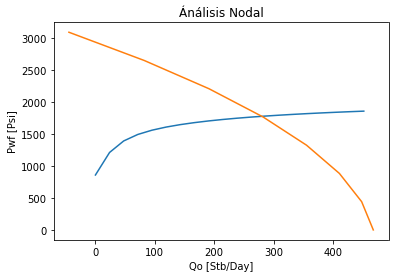

In [7]:
graphout(xx,yy,d=2.5)

In [8]:
###    METODO DE ESTANDING**
epwf2 =1765  # presion de fondo del pozo, psi
epr2 =2185   #presion de reservorio, psi
epb2 = 2000  #presion de borbuja, psi
eqo2 = 202   #tasa de produccion, stb/day
ef1 = 0.7    #eficiencia de flujo tomada en la prueba
ef2 = 1.3    #eficiencia de flujo a estimar

In [13]:
def calstanding ():
  pwf2 = float(epwf2)
  pr2 = float(epr2)
  qo2 = float(eqo2)
  f1 = float(ef1)
  x = 1-(pwf2/pr2)
  qmax1in = qo2 / ((1.8*f1*(x))-(0.8*(f1**2)*((x)**2)))
  qmax1 = qmax1in * ((1.8*f1*(1))-(0.8*(f1**2)*((1)**2)))
  return (qmax1)
def calstanding2():
  pwf2 = float(epwf2)
  pr2 = float(epr2)
  qo2 = float(eqo2)
  f1 = float(ef1)
  f2 = float(ef2)
  x = 1 - (pwf2 / pr2)
  qmax1in = qo2 / ((1.8 * f1 * (x)) - (0.8 * (f1 ** 2) * ((x) ** 2)))
  qmax1 = qmax1in * ((1.8 * f1 * (1)) - (0.8 * (f1 ** 2) * ((1) ** 2)))
  qmax2 = qmax1 * (0.624 + (0.376*f2))
  return (qmax2)
qmax1=calstanding()
qmax2=calstanding2()
for graph in range(8):
  def calcular ():
      grafico1=[]
      f1 = float(ef1)
      if f1 < 1 :
          a = float(epr2)
          y = np.linspace(0, a)
      else :
          pr = float(epr2)
          pwf = pr*(1 - (1/f1))
          y = np.linspace(pwf, pr)
      for y in y :
          if (epr2) < (epb2) :
              qo = float(eqo2)
              pr = float(epr2)
              f1 = float(ef1)
              f2 = float(ef2)
              pwf = float(epwf2)
              x11 = 1-(y/(pr))
              r = 1-(pwf/pr)
              qomax1 = qo / ((1.8*f1*(r))-(0.8*(f1**2)*((r)**2)))
              x1 = qomax1 * (((1.8*f1*(x11))-(0.8*(f1**2)*((x11)**2))))
              grafico1.append(x1)
          else :
              if (epwf2) >= (epb2) :
                  qo = float(eqo2)
                  pr = float(epr2)
                  pwf = float(epwf2)
                  f1 = float(ef1)
                  f2 = float(ef2)
                  pb = float(epb2)
                  J1 = qo/(pr-pb)
                  x = (1-(y/pb))
                  x1 = (J1*(pr-pb)) + ((J1*pb/1.8)*((1.8*x)-(0.8*f1*(x**2))))
                  #J2 = J1*f2/f1
                  #x2 = (J2*(pr-pb)) + ((J2*pb/1.8)*((1.8*x)-(0.8*f2*(x**2))))
                  grafico1.append(x1)
                  #grafico2.append(x2)
                  #limit.append(qmaxf2)
              else :
                  qo = float(eqo2)
                  pr = float(epr2)
                  f1 = float(ef1)
                  f2 = float(ef2)
                  pwf = float(epwf2)
                  pb = float(epb2)
                  r = 1-(pwf/pb)
                  x = 1-(y/pb)
                  J1 = qo / ((pr-pb)+((pb/1.8)*((1.8*r)-(0.8*f1*(r**2)))))
                  x1 = (J1*(pr-pb)) + ((J1*pb/1.8)*((1.8*x)-(0.8*f1*(x**2))))
                  grafico1.append(x1)
      f1 = float(ef1)
      if f1 < 1:
          a = float(epr2)
          y = np.linspace(0, a)
      else:
          pr = float(epr2)
          pwf = pr * (1 - (1 / f1))
          y = np.linspace(pwf, pr)
      return (grafico1,y)
  def calcular1():
    grafico2 = []
    if float(ef2) < 1:
        a = float(epr2)
        y1 = np.linspace(a, 0)
    else:
        pr = float(epr2)
        pwfg = pr * (1 - (1 / float(ef2)))
        y1 = np.linspace(pr, pwfg)
    for y1 in y1:
        if (epr2) < (epb2):
            qo = float(eqo2)
            pr = float(epr2)
            f1 = float(ef1)
            f2 = float(ef2)
            pwf = float(epwf2)
            x11 = 1 - (y1 / (pr))
            r = 1 - (pwf / pr)
            qomax1 = qo / ((1.8 * f1 * (r)) - (0.8 * (f1 ** 2) * ((r) ** 2)))
            #x1 = qomax1 * (((1.8 * f1 * (x11)) - (0.8 * (f1 ** 2) * ((x11) ** 2))))
            qmaxf2 = qomax1 * (0.624 + (0.376*f2))
            x2 = qomax1 * (((1.8 * f2 * (x11)) - (0.8 * (f2 ** 2) * ((x11) ** 2))))
            grafico2.append(x2)
        else:
            if (epwf2) >= (epb2):
                qo = float(eqo2)
                pr = float(epr2)
                pwf = float(epwf2)
                f1 = float(ef1)
                f2 = float(ef2)
                pb = float(epb2)
                J1 = qo / (pr - pb)
                x = (1 - (y1 / pb))
                #x1 = (J1 * (pr - pb)) + ((J1 * pb / 1.8) * ((1.8 * x) - (0.8 * f1 * (x ** 2))))
                J2 = J1*f2/f1
                x2 = (J2*(pr-pb)) + ((J2*pb/1.8)*((1.8*x)-(0.8*f2*(x**2))))
                grafico2.append(x2)
            else:
                qo = float(eqo2)
                pr = float(epr2)
                f1 = float(ef1)
                f2 = float(ef2)
                pwf = float(epwf2)
                pb = float(epb2)
                r = 1 - (pwf / pb)
                x = 1 - (y1 / pb)
                J1 = qo / ((pr - pb) + ((pb / 1.8) * ((1.8 * r) - (0.8 * f1 * (r ** 2)))))
                #x1 = (J1 * (pr - pb)) + ((J1 * pb / 1.8) * ((1.8 * x) - (0.8 * f1 * (x ** 2))))
                J2 = J1*f2/f1
                x2 = (J2 * (pr - pb)) + ((J2 * pb / 1.8) * ((1.8 * x) - (0.8 * f2 * (x ** 2))))
                grafico2.append(x2)
    f2 = float(ef2)
    if f2 < 1:
        a = float(epr2)
        y1 = np.linspace(0, a)
    else:
        pr = float(epr2)
        pwfg = pr * (1 - (1 / f2))
        y1 = np.linspace(pr, pwfg)
    return(grafico2, y1)

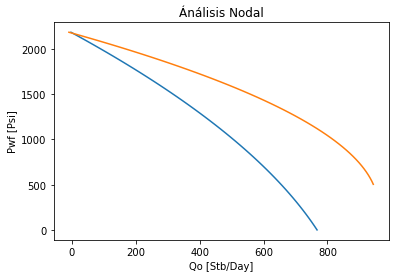

In [14]:
grafico1,y=calcular()
grafico2,y1=calcular1()
plt.plot(grafico1, y,grafico2, y1)
plt.title("Ánálisis Nodal")
plt.xlabel("Qo [Stb/Day]")
plt.ylabel("Pwf [Psi]")
plt.show()

In [19]:
import math
Profundidad = 5000    #Profundidad del pozo (ft)
d = 3.5               #diametro del tubing (in)
Ee = 0.0006           #Rugosidad del tubing
glr = 200             #relacion gas-liquido (ssf/stb)
PWH = 150             #Presion cabezal (psi)
Profcabe = 0          #profundidad cabezal(ft)
api = 30              #API
sgg = 0.664           #Gravedad especifica del gas
sgw = 1.07            #Gravedad especifica del agua
ts = 80               #Temperatura de superfici (°f)
tf = 180              #Temperatura de superfici (°f)
tsw = 74              #Tesion superficial agua (dynas/cm)
tso = 30              #Tesion superficial oil (dynas/cm)
ug = 0.0131           #Viscosidad  Gas (cp)
Uoprom = 100          #viscosidad oil (cp)
Uwprom =5             #viscosidad water (cp)
qw1 = 50              #Cauda de agua (bbl/dia)
def graphout (grafico2,d):

  q = float(eqo2)
  Qx = np.linspace(1,grafico2[-1], 20)
  Py = []
  for j in range(len(Qx)):
      qo1 = Qx[j]
      T = ts
      P = PWH
      tvd = Profcabe
      for i in range(20):
          yo = 141.5 / (131.5 + api)
          ql = qo1 + qw1
          wor1 = (qw1 / (qo1 + 1))
          m1 = ((yo * 350) * (1 / (1 + wor1))) + ((sgw * 350) * (wor1 / (1 + wor1))) + (0.0764 * glr * sgg)
          w1 = (qo1 + qw1) * m1
          xp = (0.0125 * api) - (0.00091 * T)
          rsp = sgg * (((P / 18.2) + 1.4) * (10 ** xp)) ** 1.2048
          bop = 0.972 + (0.000147 * ((rsp * (sgw / yo) ** (1 / 2)) + 1.255))
          denliq1 = ((((yo * 62.4) + ((rsp * sgg * 0.0764) / 5.614)) / bop) * (1 / (1 + wor1))) + (sgw * 62.4 * (wor1 / (1 + wor1)))
          Prsp = (P / (677 + (15 * sgg) - (37.7 * sgg ** 2)))
          Trsp = ((T + 460) / (168 + (325 * sgg) - (12.5 * (sgg) ** 2)))
          Z = 1 - ((3.52 * Prsp) / (10 ** (0.9813 * Trsp))) + ((0.274 * (Prsp) ** 2) / (10 ** (0.8157 * Trsp)))
          dgp = sgg * 0.0764 * (P / 14.7) * (520 / (T + 460)) * (1 / Z)
          Ulm = (Uoprom * (1 / (1 + wor1))) + (Uwprom * (wor1 / (1 + wor1)))
          TSL1 = (tso * (1 / (1 + wor1))) + (tsw * (wor1 / (1 + wor1)))
          NL1 = 0.15726 * Ulm * ((1 / (denliq1 * (TSL1) ** 3)) ** (1 / 4))
          CNL1 = (0.0019 + (0.0322 * NL1) - (0.664 * ((NL1) ** 2)) + (4.995 * ((NL1) ** 3))) / (1 - (10.0147 * NL1) + (33.8696 * ((NL1) ** 2)) + (277.28 * ((NL1) ** 3)))
          Area = (math.pi * (d) ** 2) / (4 * 144)
          Vslp1 = ((5.61 * (qo1 + qw1)) / (86400 * Area)) * ((bop * (1 / (1 + wor1))) + (1 * (wor1 / (1 + wor1))))
          Nlv1 = (1.938 * Vslp1 * (denliq1 / TSL1) ** (1 / 2))
          Vsgp1 = ((qo1 + qw1) * glr / (86400 * Area)) * (14.7 / P) * ((T + 460) / 520) * (Z / 1)
          Ngv1 = 1.938 * Vsgp1 * (denliq1 / TSL1) ** (1 / 4)
          Nd1 = 120.872 * (d / 12) * (denliq1 / TSL1) ** (1 / 2)
          XH1 = (Nlv1 / Ngv1 ** (0.575)) * ((P) / 14.7) ** (0.1) * (CNL1 / Nd1)
          HLPhi1 = ((0.0047 + (1123.32 * XH1) + (729489.64 * (XH1) ** 2)) / (1 + (1097.1566 * XH1) + (722153.97 * (XH1) ** 2))) ** (1 / 2)
          MR1 = (Ngv1 * (NL1) ** (0.38)) / Nd1 ** 2.14
          Phi1 = (1.0886 - (69.9473 * MR1) + (2334.3497 * (MR1 ** 2)) - (12896.683 * (MR1 ** 3))) / (1 - (53.4401 * MR1) + (1517.9369 * (MR1 ** 2)) - (8419.811 * (MR1 ** 3)))
          HL1 = HLPhi1 * Phi1
          Nre = (2.2 * (10 ** (-2)) * w1 * ql) / ((d / 12) * (Ulm ** HL1) * (ug ** (1 - HL1)))
          if Nre > 2100:
              f = 1 / (-4 * math.log((Ee / 3.7065) - (5.0452 / Nre) * math.log(((Ee ** 1.1098) / 2.8257)) + (
                          7.149 / Nre) ** 0.8981)) ** 2
          else:
              f = 16 / Nre
          denprom = (denliq1 * HL1) + (dgp * (1 - HL1))
          yl = 62.4 * ((yo / (1 + wor1)) + (sgw * wor1 / (1 + wor1)))
          gradiente = (1 / 144) * (denprom + ((f * (m1 ** 2)) / (denprom * (7.413 * (10 ** 10)) * ((d / 12) ** 5))))
          tvd1 = tvd + (Profundidad - Profcabe) / 20
          P = P + (gradiente * (tvd1 - tvd))
          T = ts + (tf - ts) / Profundidad * tvd1
          tvd = tvd1
      Py.append(P)
  plt.plot(Qx, Py,grafico1, y,grafico2, y1)
  plt.title("Ánálisis Nodal")
  plt.xlabel("Qo [Stb/Day]")
  plt.ylabel("Pwf [Psi]")
  plt.show()

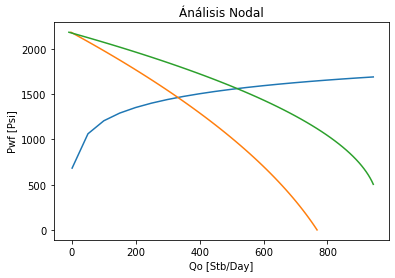

In [20]:
graphout(grafico2,d=3.5)

In [21]:
epr3= 3600  #presion de reservorio (psi)
p1=3170     #pwf de prueba 1 (psi)
p2=2897     #pwf de prueba 2 (psi)
p3=2440     #pwf de prueba 3 (psi)
p4=2150     #pwf de prueba 4 (psi)
q1=263      #Qo de prueba 1 (stb/day)
q2=383      #Qo de prueba 2 (stb/day)
q3=497      #Qo de prueba 3 (stb/day)
q4=640      #Qo de prueba 4 (stb/day)

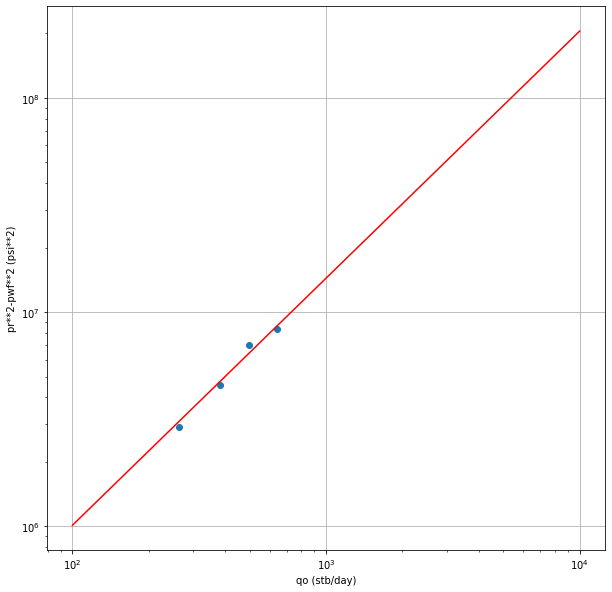

In [22]:
def graficlog ():
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.optimize import curve_fit

  # Abhishek Bhatia's data & scatter plot.

  fig = plt.figure(figsize=(10,10))
  ax=plt.gca() 
  p11 = p1
  p22 = p2
  p33 = p3
  p44 = p4
  q11 = q1
  q22 = q2
  q33 = q3
  q44 = q4
  pr = epr3
  y1 = [(pr**2-p11**2), (pr**2-p22**2), (pr**2-p33**2), (pr**2-p44**2)]
  x1 = [q11, q22, q33, q44]
  x=np.array(x1)
  y=np.array(y1)
  ax.scatter(x,y)
  ax.set_yscale('log')
  ax.set_xscale('log')
  X = np.logspace(2, 4, base=10) 
                                  
  def myExpFunc(x, a, b):
      return a * np.power(x, b)
  popt, pcov = curve_fit(myExpFunc, x, y)

  plt.plot(X, myExpFunc(X, *popt), 'r-')
  ax.grid(b='on')
  plt.ylabel("pr**2-pwf**2 (psi**2)")
  plt.xlabel("qo (stb/day)")
  plt.show()
graficlog()

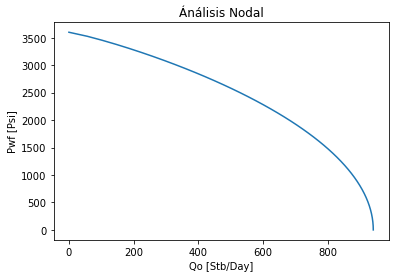

In [23]:
eqo1=100     # punto log(q1)
eqo2=750     # punto log(q2)
epre1=10**6  # punto log1(pr^2-p^2)
epre2=10**7  # punto log2(pr^2-p^2)

def calculo_n_c():
  import math

  qo1 = float(eqo1)
  qo2 = float(eqo2)
  pres1 = float(epre1)
  pres2 = float(epre2)
  n = float(abs((math.log(qo2) - math.log(qo1)) / (math.log(pres2) - math.log(pres1))))
 
  c = eqo2 / ((epre2) ** n)
  return n,c
n,c=calculo_n_c()
def qmax (n,c,pr):
  qomax = c * (pr**2)**n
  return qomax
qomax= qmax(n=n,c=c,pr=epr3)

for graph in range(8):
  def grafico ():
      grafico7 =[]
      a = float(epr3)
      y = np.linspace(0, a)
      for y in y:
          qo = c * ((epr3 ** 2) - (y ** 2)) ** n
          grafico7.append(qo)
      a = float(epr3)
      y = np.linspace(0, a)
      plt.plot(grafico7, y)
      plt.title("Ánálisis Nodal")
      plt.xlabel("Qo [Stb/Day]")
      plt.ylabel("Pwf [Psi]")
      plt.show()
      return grafico7, y
grafico7, y=grafico()

In [24]:
Profundidad = 5000    #Profundidad del pozo (ft)
d = 3.5               #diametro del tubing (in)
Ee = 0.0006           #Rugosidad del tubing
glr = 200             #relacion gas-liquido (ssf/stb)
PWH = 150             #Presion cabezal (psi)
Profcabe = 0          #profundidad cabezal(ft)
api = 30              #API
sgg = 0.664           #Gravedad especifica del gas
sgw = 1.07            #Gravedad especifica del agua
ts = 80               #Temperatura de superfici (°f)
tf = 180              #Temperatura de superfici (°f)
tsw = 74              #Tesion superficial agua (dynas/cm)
tso = 30              #Tesion superficial oil (dynas/cm)
ug = 0.0131           #Viscosidad  Gas (cp)
Uoprom = 100          #viscosidad oil (cp)
Uwprom =5             #viscosidad water (cp)
qw1 = 50              #Cauda de agua (bbl/dia)

def graphout (grafico7,d):

  import math
  
  Qx = np.linspace(1, grafico7[0], 20)
  Py = []
  for j in range(len(Qx)):
      qo1 = Qx[j]
      T = ts
      P = PWH
      tvd = Profcabe
      for i in range(20):
          yo = 141.5 / (131.5 + api)
          ql = qo1 + qw1
          wor1 = (qw1 / (qo1 + 1))
          m1 = ((yo * 350) * (1 / (1 + wor1))) + ((sgw * 350) * (wor1 / (1 + wor1))) + (0.0764 * glr * sgg)
          w1 = (qo1 + qw1) * m1
          xp = (0.0125 * api) - (0.00091 * T)
          rsp = sgg * (((P / 18.2) + 1.4) * (10 ** xp)) ** 1.2048
          bop = 0.972 + (0.000147 * ((rsp * (sgw / yo) ** (1 / 2)) + 1.255))
          denliq1 = ((((yo * 62.4) + ((rsp * sgg * 0.0764) / 5.614)) / bop) * (1 / (1 + wor1))) + (sgw * 62.4 * (wor1 / (1 + wor1)))
          Prsp = (P / (677 + (15 * sgg) - (37.7 * sgg ** 2)))
          Trsp = ((T + 460) / (168 + (325 * sgg) - (12.5 * (sgg) ** 2)))
          Z = 1 - ((3.52 * Prsp) / (10 ** (0.9813 * Trsp))) + ((0.274 * (Prsp) ** 2) / (10 ** (0.8157 * Trsp)))
          dgp = sgg * 0.0764 * (P / 14.7) * (520 / (T + 460)) * (1 / Z)
          Ulm = (Uoprom * (1 / (1 + wor1))) + (Uwprom * (wor1 / (1 + wor1)))
          TSL1 = (tso * (1 / (1 + wor1))) + (tsw * (wor1 / (1 + wor1)))
          NL1 = 0.15726 * Ulm * ((1 / (denliq1 * (TSL1) ** 3)) ** (1 / 4))
          CNL1 = (0.0019 + (0.0322 * NL1) - (0.664 * ((NL1) ** 2)) + (4.995 * ((NL1) ** 3))) / (1 - (10.0147 * NL1) + (33.8696 * ((NL1) ** 2)) + (277.28 * ((NL1) ** 3)))
          Area = (math.pi * (d) ** 2) / (4 * 144)
          Vslp1 = ((5.61 * (qo1 + qw1)) / (86400 * Area)) * ((bop * (1 / (1 + wor1))) + (1 * (wor1 / (1 + wor1))))
          Nlv1 = (1.938 * Vslp1 * (denliq1 / TSL1) ** (1 / 2))
          Vsgp1 = ((qo1 + qw1) * glr / (86400 * Area)) * (14.7 / P) * ((T + 460) / 520) * (Z / 1)
          Ngv1 = 1.938 * Vsgp1 * (denliq1 / TSL1) ** (1 / 4)
          Nd1 = 120.872 * (d / 12) * (denliq1 / TSL1) ** (1 / 2)
          XH1 = (Nlv1 / Ngv1 ** (0.575)) * ((P) / 14.7) ** (0.1) * (CNL1 / Nd1)
          HLPhi1 = ((0.0047 + (1123.32 * XH1) + (729489.64 * (XH1) ** 2)) / (1 + (1097.1566 * XH1) + (722153.97 * (XH1) ** 2))) ** (1 / 2)
          MR1 = (Ngv1 * (NL1) ** (0.38)) / Nd1 ** 2.14
          Phi1 = (1.0886 - (69.9473 * MR1) + (2334.3497 * (MR1 ** 2)) - (12896.683 * (MR1 ** 3))) / (1 - (53.4401 * MR1) + (1517.9369 * (MR1 ** 2)) - (8419.811 * (MR1 ** 3)))
          HL1 = HLPhi1 * Phi1
          Nre = (2.2 * (10 ** (-2)) * w1 * ql) / ((d / 12) * (Ulm ** HL1) * (ug ** (1 - HL1)))
          if Nre > 2100:
              f = 1 / (-4 * math.log((Ee / 3.7065) - (5.0452 / Nre) * math.log(((Ee ** 1.1098) / 2.8257)) + (
                          7.149 / Nre) ** 0.8981)) ** 2
          else:
              f = 16 / Nre
          denprom = (denliq1 * HL1) + (dgp * (1 - HL1))
          yl = 62.4 * ((yo / (1 + wor1)) + (sgw * wor1 / (1 + wor1)))
          # gradiente = (denprom/144) + ((f*(vm**2))/(2*32.2*denprom*(d/12))*(12/144))
          gradiente = (1 / 144) * (denprom + ((f * (m1 ** 2)) / (denprom * (7.413 * (10 ** 10)) * ((d / 12) ** 5))))
          tvd1 = tvd + (Profundidad - Profcabe) / 20
          P = P + (gradiente * (tvd1 - tvd))
          T = ts + (tf - ts) / Profundidad * tvd1
          tvd = tvd1
      Py.append(P)
  plt.plot(Qx, Py,grafico7, y)
  plt.title("Ánálisis Nodal")
  plt.xlabel("Qo [Stb/Day]")
  plt.ylabel("Pwf [Psi]")
  plt.show()

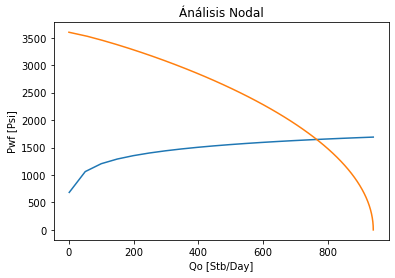

In [25]:
graphout(grafico7,d=3.5)